This notebook is being used for studying purposes. I am following medium post
[Predicting Invasive Ductal Carcinoma using Convolutional Neural Network (CNN) in Keras](https://towardsdatascience.com/predicting-invasive-ductal-carcinoma-using-convolutional-neural-network-cnn-in-keras-debb429de9a6) and the medium post's [github repository](https://github.com/bikramb98/invasive-ductal-carcinoma-cnn/blob/master/Predicting%20Invasive%20Ductal%20Carcinoma%20using%20CNN%20in%20Keras.ipynb) by Bikram Baruah. The dataset used can be found [here](http://www.andrewjanowczyk.com/use-case-6-invasive-ductal-carcinoma-idc-segmentation/).

### Loading the dataset:

---



In [1]:
from glob import glob
import fnmatch
import cv2

<span style='color:blue'>
    <b>Study Notes:</b></span>
    
glob module: [doc]( https://docs.python.org/3/library/glob.html)
and [source](https://github.com/python/cpython/blob/3.8/Lib/glob.py)<br>
fnmatch module: [doc](https://docs.python.org/3/library/fnmatch.html#fnmatch.fnmatch) and [source](https://github.com/python/cpython/blob/3.8/Lib/fnmatch.py)


In [2]:
# Saves pathnames
image_patches = glob('../idc_regular_ps50_idx5/IDC_regular_ps50_idx5/*/*/*.png')

pattern_zero = '*class0.png'
pattern_one = '*class1.png'

<span style='color:blue'>
    <b>Study Notes:</b></span>
    
The function glob is retrieving the files' pathnames according to a specific pattern. The variables pattern_[blank] are string variables that, as the name indicates, are going to be used to find files of a certain pattern. In this case, ending with either 'class0.png' or 'class1.png'.

In [3]:
print(f'Lenght: {len(image_patches)} and exemple of path: {image_patches[1]}')

Lenght: 277524 and exemple of path: ../idc_regular_ps50_idx5/IDC_regular_ps50_idx5/10276/1/10276_idx5_x651_y751_class1.png


In [4]:
# Saves the image file location of all images according to its class (0 or 1)
class_zero = fnmatch.filter(image_patches, pattern_zero)
class_one = fnmatch.filter(image_patches, pattern_one)

<span style='color:blue'>
    <b>Study Notes:</b></span>

Here we're filtering the list of pathnames by its class.


In [5]:
def process_images(lower_index, upper_index):
    height, width, channels = 50, 50, 3
    
    x = [] #list to store image data
    y = [] #list to store labels
    
    for img in image_patches[lower_index:upper_index]:
        full_size_image = cv2.imread(img)
        image = (cv2.resize(full_size_image, (width, height), interpolation = cv2.INTER_CUBIC))
        
        x.append(image)
    
        if img in class_zero:
            y.append(0)
        elif img in class_one:
            y.append(1)
        else:
            return

    return x, y

<span style='color:blue'>
    <b>Study Notes:</b></span>
    
Will have to look more into cv2 and OpenCV later. From what I've gathered, imread loads an image, as the name somewhat indicates. Now INTER_CUBIC seems to be a type of interpolation, I have found a little about it [here](https://chadrick-kwag.net/cv2-resize-interpolation-methods/), but will have to read and research it a little bit better. 

<span style='color:red'>Must come back later to this note.</span>

In [6]:
X, Y = process_images(0, 60000)

### Data preprocessing
***

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

<span style='color:blue'>
    <b>Study Notes:</b></span>
    
More about train_test_split [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). But it's very self explanatory, it splits the arrays into random train and test subsets. Using the parameter test_size you can indicate the proportion of the dateset that will be included in the test subset. There is a train_size as well that works the same way, except for the train subset. There are other interesting parameters to try and test it out later. 

<span style='color:red'>Must come back later to this note.</span>



In [8]:
X = np.array(X)
X = X.astype(np.float32)
X /= 255. # Ensures values between 0 and 1

In [10]:
# Splits training and test set, reserves 15% of the dataset for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15) 

In [11]:
print(f'There are {y_train.count(1)} 1s and {y_train.count(0)} 0s.\nLenght: {len(y_train)}')

There are 15240 1s and 35760 0s.
Lenght: 51000


In [9]:
import keras
from keras.utils import to_categorical

<span style='color:blue'>
    <b>Study Notes:</b></span>

Here we are one-hot-enconding the output. For future reference, read [this](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

NameError: name 'y_train' is not defined

In [13]:
print(f'x_train shape:{x_train.shape}\nx_test shape:{x_test.shape}')

x_train shape:(51000, 50, 50, 3)
x_test shape:(9000, 50, 50, 3)


In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [13]:
x_test_flat.shape

(9000, 7500)

### Undersampling the data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

<span style='color:blue'>
    <b>Study Notes</b></span>

RandomUnderSampler [doc](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html). A little bit about under-sampling [here](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html) and imbalanced classification [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://www.kaggle.com/residentmario/undersampling-and-oversampling-imbalanced-data).

In under-sampling we have the removal ou some of the enxemples from the majority class and in over-sampling we have the duplication of some of the examples of the minority class. For imbalanced classification problems, one might transform the dataset randomly by either oversampling or undersampling.

For more about the subject, maybe check out [Learning from Imbalanced Data Sets](https://towardsdatascience.com/learning-from-imbalanced-datasets-b601a1f1e154) more carefully later (check the resources as well).

<span style='color:red'>Must come back later to this note.</span>

In [ ]:
random_under_sampler = RandomUnderSampler(sampling_strategy='majority')


<span style='color:red'>
    <b>Obs Notes</b></span>
    
Ratio has been deprecate since version 0.4. Use the parameter sampling strategy instead.

In [ ]:
x_trainRus, y_trainRus = random_under_sampler.fit_sample(x_train_flat, y_train)
x_testRus, y_testRus = random_under_sampler.fit_sample(x_test_flat, y_test)

In [ ]:
print(f'Shapes:\nx_trainRus: {x_trainRus.shape}')
print(f'y_trainRus: {y_trainRus.shape}')
print(f'x_testRus: {x_testRus.shape}')
print(f'y_testRus: {y_testRus.shape}')
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')

In [ ]:
y_trainRus_hot = to_categorical(y_trainRus, num_classes=2)
y_testRus_hot = to_categorical(y_testRus, num_classes = 2)

In [21]:
np.unique(y_trainRus_hot, return_counts=True)

(array([0., 1.], dtype=float32), array([30490, 30490]))

In [22]:
np.unique(y_testRus_hot, return_counts=True)

(array([0., 1.], dtype=float32), array([5300, 5300]))

In [ ]:
height, width, channels = 50,50,3
for i in range(len(x_trainRus)):
    x_trainRus_reshaped = x_trainRus.reshape(len(x_trainRus), height, width, channels)

for i in range(len(x_testRus)):
    x_testRus_reshaped = x_testRus.reshape(len(x_testRus), height, width, channels)

In [24]:
x_testRus_reshaped.shape

(5300, 50, 50, 3)

### Model Architecture
***

In [ ]:
batch_size = 256
num_classes = 2
epochs = 50

In [ ]:
from keras.models import Sequential


<span style='color:blue'>
    <b>Study Notes</b></span>

More about Sequential: [doc](https://keras.io/api/models/sequential/) and [guide](https://keras.io/guides/sequential_model/).

In [33]:
model = Sequential()

In [29]:
model.layers

[]

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

<span style='color:blue'>
    <b>Study Notes</b></span>
    
Need to look more into Conv2D and MaxPooling2D. 

In [ ]:
model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(50,50,3)))

In [32]:
model.layers

In [33]:
type(model.layers)

list

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [35]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Flatten()) #this converts our 3D feature maps to 1D feature vectors for the dense layer below
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

<span style='color:blue'>
<b>Study notes</b></span>

Must look into the order the layers were added later on. [Here](https://keras.io/api/layers/convolution_layers/) you can see different convolution layers classes with Conv2D [here](https://keras.io/api/layers/convolution_layers/convolution2d/). [Here](https://keras.io/api/layers/pooling_layers/) pooling layers and [here](https://keras.io/api/layers/pooling_layers/max_pooling2d/) the MaxPooling2d layer class.

In [36]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.00001),
              metrics=['accuracy'])

In [37]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=180,
    horizontal_flip=True,vertical_flip = True)

<span style='color:blue'>
<b>Study notes</b></span>

[Here](https://keras.io/api/metrics/) you can find a bit more about metrics in general and the compile() method. And [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) and [here](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/) about image data augmentation in keras.

In [38]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=3, mode='min')
model_checkpoint = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

With `callbacks=[early_stopping_monitor, model_checkpoint]`

In [39]:
training = model.fit_generator(datagen.flow(x_trainRus_reshaped,y_trainRus_hot,batch_size=batch_size),
                    steps_per_epoch=len(x_trainRus_reshaped) / batch_size, epochs=epochs,validation_data=(x_testRus_reshaped, y_testRus_hot), verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.


/home/bea/.local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/bea/.local/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
120/119 [==============================] - 110s 914ms/step - loss: 0.6911 - accuracy: 0.5095 - val_loss: 0.6848 - val_accuracy: 0.5002
Epoch 2/50
120/119 [==============================] - 108s 899ms/step - loss: 0.6717 - accuracy: 0.6134 - val_loss: 0.6228 - val_accuracy: 0.7220
Epoch 3/50
120/119 [==============================] - 107s 890ms/step - loss: 0.5899 - accuracy: 0.7235 - val_loss: 0.5184 - val_accuracy: 0.7548
Epoch 4/50
120/119 [==============================] - 106s 882ms/step - loss: 0.5249 - accuracy: 0.7564 - val_loss: 0.4842 - val_accuracy: 0.7746
Epoch 5/50
120/119 [==============================] - 107s 892ms/step - loss: 0.5048 - accuracy: 0.7688 - val_loss: 0.4754 - val_accuracy: 0.7793
Epoch 6/50
120/119 [==============================] - 103s 857ms/step - loss: 0.4939 - accuracy: 0.7766 - val_loss: 0.4891 - val_accuracy: 0.7716
Epoch 7/50
120/119 [==============================] - 103s 858ms/step - loss: 0.4873 - accuracy: 0.7775 - val_loss: 0.4746 -

<span style='color:blue'>
<b>Study notes</b></span>

Have to change and use `fit` instead of `fit_generator` and look more into the method [here](https://keras.rstudio.com/reference/fit.html). fit_generator doc [here](https://keras.rstudio.com/reference/fit_generator.html).
[this](https://keras.io/guides/training_with_built_in_methods/)

In [41]:
import matplotlib.pyplot as plt

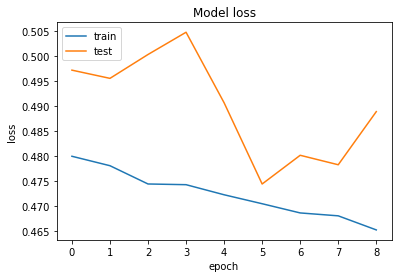

In [45]:
# plt.plot(training.history['loss'])
# plt.plot(training.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc='upper left')
# plt.show()

<span style='color:blue'>
<b>Study notes</b></span>

Third attempt at the model, with `callbacks=[early_stopping_monitor, model_checkpoint]` in training model. The kernel crashed quite a few times. Need to read more about EarlyStopping and ModelCheckpoint in order to properly understand the graph and why there were so few epochs.

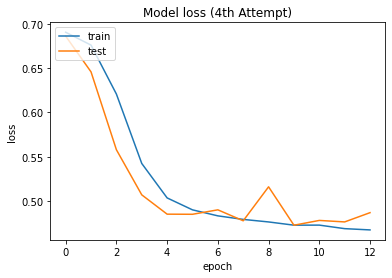

In [33]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model loss (4th Attempt)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

<span style='color:blue'>
<b>Study notes</b></span>

Forth attempt at the model, with `callbacks=[early_stopping_monitor, model_checkpoint]` in training model in a different distro (mint instead of ubuntu), there were 13 epochs. 

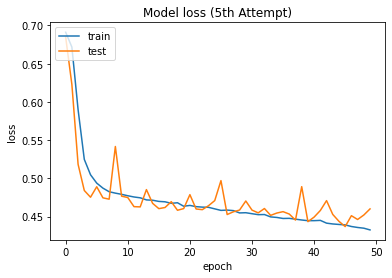

In [42]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model loss (5th Attempt)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Have to try again tomorrow


<span style='color:blue'>
<b>Study notes</b></span>

Fifth attempt at the model, but without early_stopping_monitor and model_checkpoint. I wanted to see how it would influence and if there would be any major difference.

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [47]:
from keras.models import load_model
from sklearn import metrics
model = load_model('best_model.h5')
y_pred_one_hot = model.predict(x_testRus_reshaped)
y_pred_labels = np.argmax(y_pred_one_hot, axis = 1)
y_true_labels = np.argmax(y_testRus_hot,axis=1)

In [48]:
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

In [49]:
confusion_matrix

array([[2075,  580],
       [ 546, 2109]])

In [56]:
print(f'Predicted malignant and actually malignant (True Positive): {confusion_matrix[0,0]}')
print(f'Predicted malignant but actually benign (False Postive): {confusion_matrix[0,1]}')
print(f'Predicted benign but actually malignant (False Negative): {confusion_matrix[1,0]}')
print(f'Predicted begnign and actually benign (True Negative): {confusion_matrix[1,1]}')

Predicted malignant and actually malignant (True Positive): 2075
Predicted malignant but actually benign (False Postive): 580
Predicted benign but actually malignant (False Negative): 546
Predicted begnign and actually benign (True Negative): 2109


<span style='color:blue'>
<b>Study notes</b></span>

Article note: In this case a false negative is better than a false positive, since it influences how the pacient will be treated. So it's good that there are less false negatives than false positives.

<span style='color:blue'>
    <b>Study session notes</b></span>

<sub>(Other days hidden)</sub>
<!-- 03/07:<br>
Search more about Google Colab and how to work with a big database. The kernel crashed a few times and it was a bit annoying. It happened almost always while using the train_test_split function. 

While not necessarily adjacent to the notebook, look into the possibility of using the notebook outside of the conda environment. Had a few problems downloading certain modules through `conda`.  -->
<!-- 
04/07:<br>

Difficulties with class RandomUnderSampler, must look more into it, didn't recognize keyword ratio. Should look into [A Deep Learning Architecture for Classifying
Medical Images of Anatomy Object](http://www.apsipa.org/proceedings/2017/CONTENTS/papers2017/15DecFriday/FP-02/FP-02.3.pdf) to understand a bit more about the model used. Need to read more overall.

I was able to follow up until "Model Architecture". In order to continue, read the paper linked and google a bit more about it. Also reread tensorflow guide about sequential model.

Must convert data back to its original shape of 50 x 50 x 3. -->